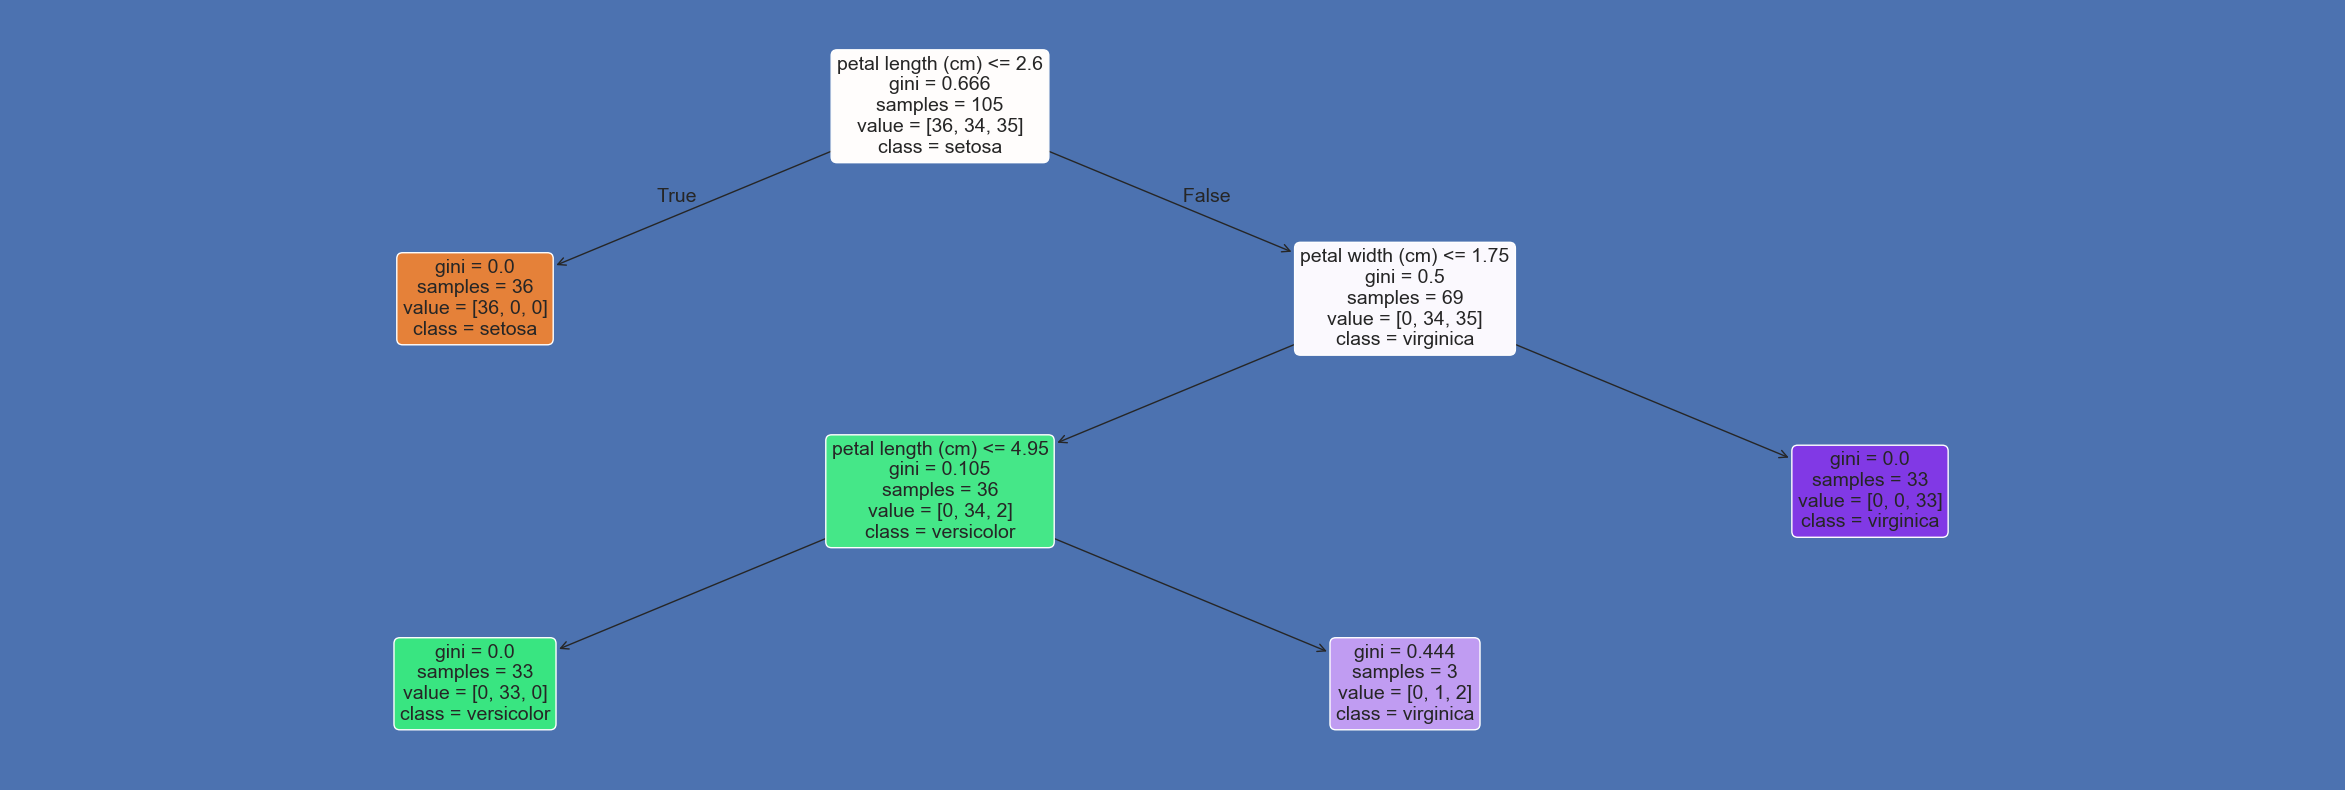

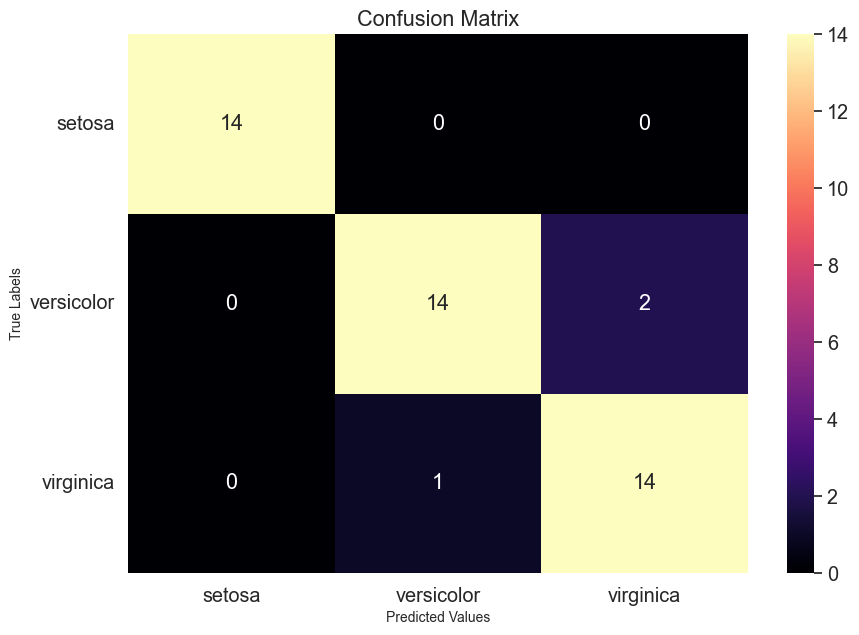

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target
target_dict = dict(zip(np.unique(iris.target), np.unique(iris.target_names)))
data['Species'] = data['Species'].replace(target_dict)

x = data.drop(columns="Species")
y = data["Species"]
names_features = x.columns
target_labels = list(map(str, y.unique()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=93)

dtc = DecisionTreeClassifier(max_depth=3, random_state=93)
dtc.fit(x_train, y_train)

plt.figure(figsize=(30, 10), facecolor='b')
tree.plot_tree(dtc, feature_names=names_features, class_names=target_labels, rounded=True, filled=True, fontsize=14)
plt.show()

y_pred = dtc.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 7))
axis = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix, annot=True, fmt="g", ax=axis, cmap="magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize=10)
axis.set_ylabel("True Labels", fontsize=10)
axis.set_xticklabels(target_labels)
axis.set_yticklabels(target_labels, rotation=0)
plt.show()
